In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

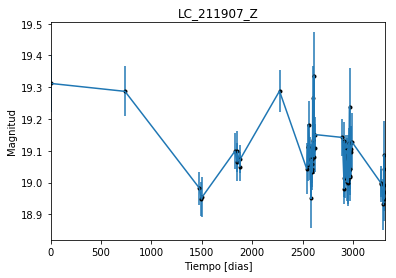

In [2]:
data = np.genfromtxt('LC_211907_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_211907_Z')
plt.savefig("LC_211907_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

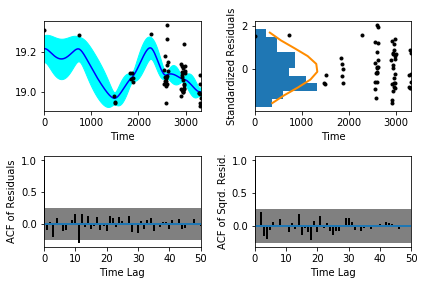

In [5]:
sample.assess_fit()

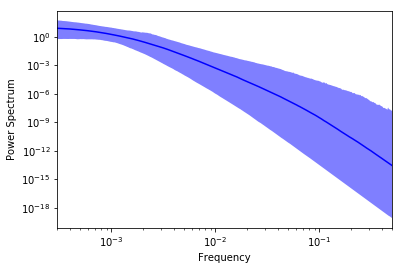

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

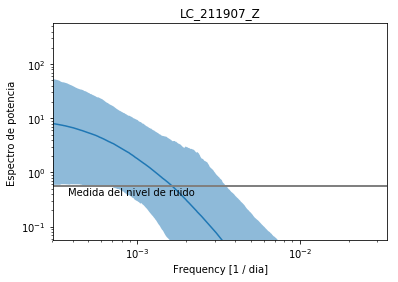

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_211907_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_211907_Z')

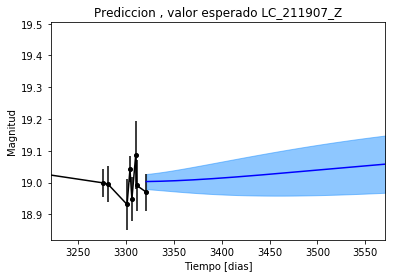

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_211907_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_211907_Z')

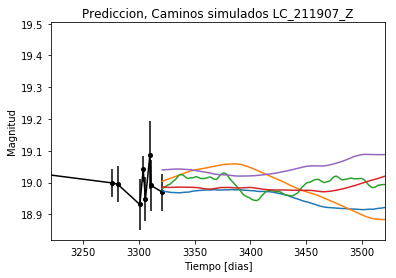

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_211907_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


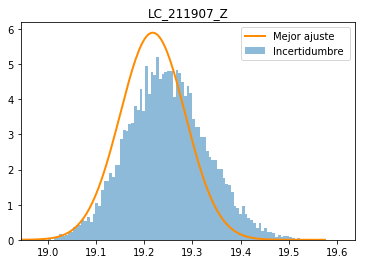

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_211907_Z')
plt.savefig("Mejor_ajuste_LC_211907_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_211907_Z')

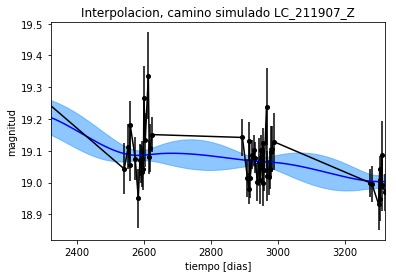

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_211907_Z')

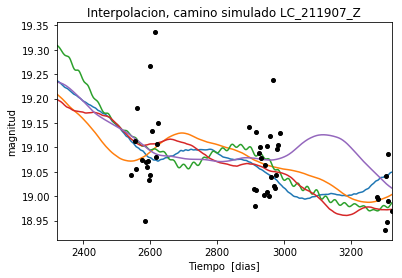

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 720.677619559
Median: 0.00752109553262
Standard deviation: 0.188780937071
68% credibility interval: [ 0.00069056  0.1571839 ]
95% credibility interval: [  3.41383311e-04   7.48302823e-01]
99% credibility interval: [  3.08658492e-04   9.47652693e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 745.875582941
Median: 0.00101189538969
Standard deviation: 0.0610049409129
68% credibility interval: [ 0.00041089  0.01082798]
95% credibility interval: [ 0.00031672  0.14408152]
99% credibility interval: [  3.05135310e-04   4.77019722e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1728.89567695
Median: 0.0137531816881
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 888.041210011
Median: 99.105383611
Standard deviation: 1.55039709422
68% credibility interval: [  97.33918755  100.11327106]
95% credibility interval: [  94.70337827  100.61454509]
99% credibility interval: [  92.72800375  100.76327457]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 626.075269085
Median: 0.518960553641
Standard deviation: 2.00006156738
68% credibility interval: [ 0.04545477  3.4824797 ]
95% credibility interval: [ 0.01257782  6.67549819]
99% credibility interval: [  9.21144294e-03   9.27875602e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 740.220857444
Median: 0.124331925792
Standard deviation: 6.21765270304
68% credibility interval: [ 0.00531515  3.52601878]
95% credibility interval: [  5.0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3946.78806317
Median: 3.64097232132e-40
Standard deviation: 8.50256846133e+88
68% credibility interval: [  5.34323218e-102   3.06849598e-012]
95% credibility interval: [  7.11969914e-161   2.90581561e+011]
99% credibility interval: [  1.40251148e-172   9.73452921e+065]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1326.50788246
Median: 19.1177689394
Standard deviation: 0.0784322485143
68% credibility interval: [ 19.06194003  19.18594474]
95% credibility interval: [ 18.96798567  19.28619634]
99% credibility interval: [ 18.85384469  19.38761191]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 846.75355565
Median: 0.000696726410728
Standard deviation: 0.184180088202
68% credibility interval: [ 0.          0.13995726]
95% credibility interval: [ 0.          0.71725805]
99% credibility interval: [ 0.          0.93808255]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 846.75355565
Median: 0.000696726410728
Standard deviation: 0.184180088202
68% credibility interval: [ 0.          0.13995726]
95% credibility interval: [ 0.          0.71725805]
99% credibility interval: [ 0.          0.93808255]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1104.23261079
Median: 0.0
Standard deviation: 0.00053433015245
68% c

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 888.041210011
Median: 99.105383611
Standard deviation: 1.55039709422
68% credibility interval: [  97.33918755  100.11327106]
95% credibility interval: [  94.70337827  100.61454509]
99% credibility interval: [  92.72800375  100.76327457]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1063.82150409
Median: 0.0159301551974
Standard deviation: 0.0287108768127
68% credibility interval: [ 0.00770507  0.03675298]
95% credibility interval: [ 0.00358713  0.08584651]
99% credibility interval: [ 0.00193925  0.17447465]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3011.76876286
Median: 0.892945338087
Standard deviation: 0.138660575479
68% credibility interval: [ 0.77279605  1.03780726]
95% credibility interval: [ 0.67449774  1.22231105]
99% credibility interval: [ 0.62131978  1.36463465]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 3543.69722461
Median: 1.41526094616e-05
Standard deviation: 0.0252329538679
68% credibility interval: [  2.99745509e-07   5.62127639e-04]
95% credibility interval: [  3.20594212e-16   8.72364663e-03]
99% credibility interval: [  5.03706169e-69   7.15725099e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 720.677619559
Median: (-0.0472564369445+0j)
Standard deviation: 1.65714825133
68% credibility interval: [-0.98761555+0.j         -0.00433890-1.50415749j]
95% credibility interval: [ -4.70172530e+00+0.j          -2.14497460e-03-0.01658793j]
99% credibility interval: [ -5.95427747e+00+0.j          -1.93935850e-03-0.00235073j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 745.875582941
Median: (-0.00635792624493+0j)
Standard deviation: 1.21906599849
68% credibility interval: [-0.06803423+3.61402999j -0.00258170+0.j        ]
95% credibility interval: [-0.90529091+3.03085274j -0.00198999+0.01354128j]
99% credibility interval: [ -2.99720331e+00+1.16558404j  -1.91722170e-03+0.00118328j]
Posterior summary for parameter ar_ro